In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:,1:]
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

In [31]:
rb_df = df.loc[df['Pos'] == 'RB']
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4


In [32]:
rb_df['Usage'] = rb_df['Tgt'] + rb_df['RushingAtt']
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339


In [33]:
rb_df['Usage/G'] = rb_df['Usage'] / rb_df['G']
rb_df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage,Usage/G
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404,23.764706
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352,20.705882
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390,24.375000
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331,19.470588
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339,19.941176
14,Saquon Barkley*,NYG,RB,25,16,16,76,57,0,0,0,0,1312,10,295,338,0,0,1,0,1.0,NaN,284.0,371,23.187500
17,Jamaal Williams,DET,RB,27,17,9,16,12,0,0,0,0,1066,17,262,73,0,0,3,2,1.0,NaN,225.9,278,16.352941
19,Tony Pollard*,DAL,RB,25,16,4,55,39,0,0,0,0,1007,9,193,371,3,0,0,0,NaN,NaN,248.8,248,15.500000
20,Dalvin Cook*,MIN,RB,27,17,17,56,39,0,0,0,0,1173,8,264,295,2,0,4,4,NaN,NaN,237.8,320,18.823529
21,Miles Sanders*,PHI,RB,25,17,15,26,20,0,0,0,0,1269,11,259,78,0,0,2,2,NaN,NaN,216.7,285,16.764706


In [34]:
rb_df['FantasyPoints/G'] = rb_df['FantasyPoints']/rb_df['G']
rb_df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage,Usage/G,FantasyPoints/G
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352,20.705882,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390,24.375000,18.925000
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331,19.470588,21.923529
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339,19.941176,16.552941
14,Saquon Barkley*,NYG,RB,25,16,16,76,57,0,0,0,0,1312,10,295,338,0,0,1,0,1.0,NaN,284.0,371,23.187500,17.750000
17,Jamaal Williams,DET,RB,27,17,9,16,12,0,0,0,0,1066,17,262,73,0,0,3,2,1.0,NaN,225.9,278,16.352941,13.288235
19,Tony Pollard*,DAL,RB,25,16,4,55,39,0,0,0,0,1007,9,193,371,3,0,0,0,NaN,NaN,248.8,248,15.500000,15.550000
20,Dalvin Cook*,MIN,RB,27,17,17,56,39,0,0,0,0,1173,8,264,295,2,0,4,4,NaN,NaN,237.8,320,18.823529,13.988235
21,Miles Sanders*,PHI,RB,25,17,15,26,20,0,0,0,0,1269,11,259,78,0,0,2,2,NaN,NaN,216.7,285,16.764706,12.747059


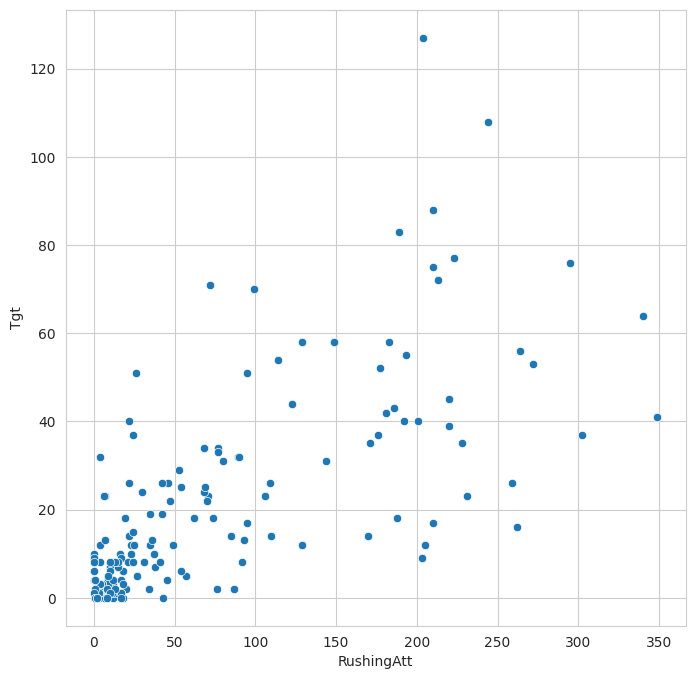

In [35]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.scatterplot(x=rb_df['RushingAtt'], y=rb_df['Tgt']);
# seems like there is a relationship that if you are heavily utilized in the run game, you have more opportunities for targets
# seaborn is a little better because it does little things like adding axis labels, edge colors

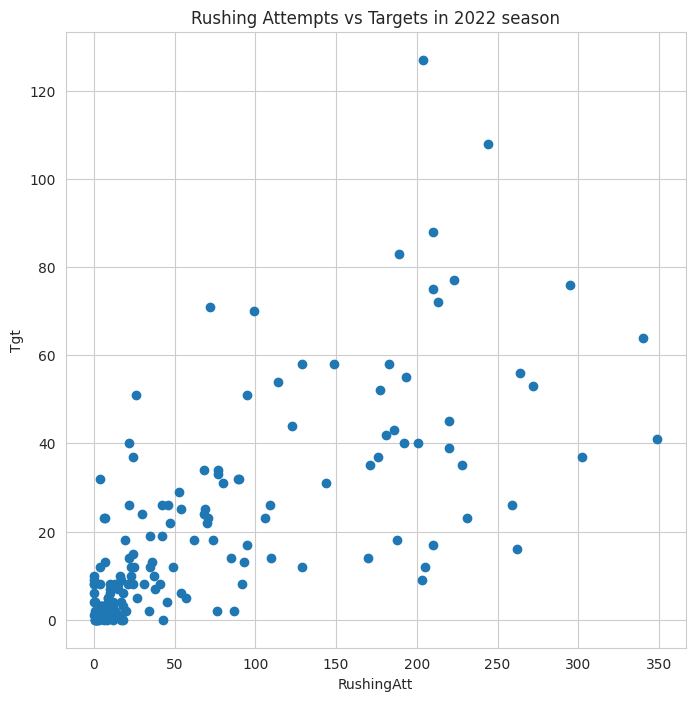

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt']);
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs Targets in 2022 season');
plt.show()

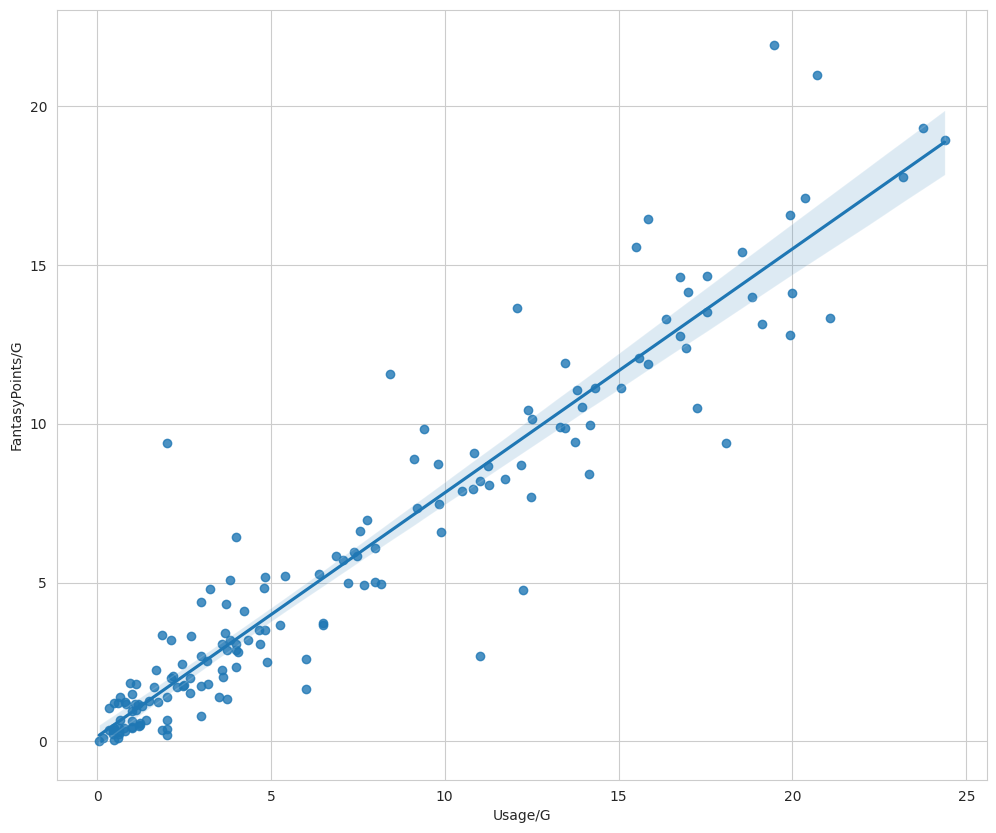

In [37]:
plt.figure(figsize=(12,10))
# regression plot
sns.regplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G']);

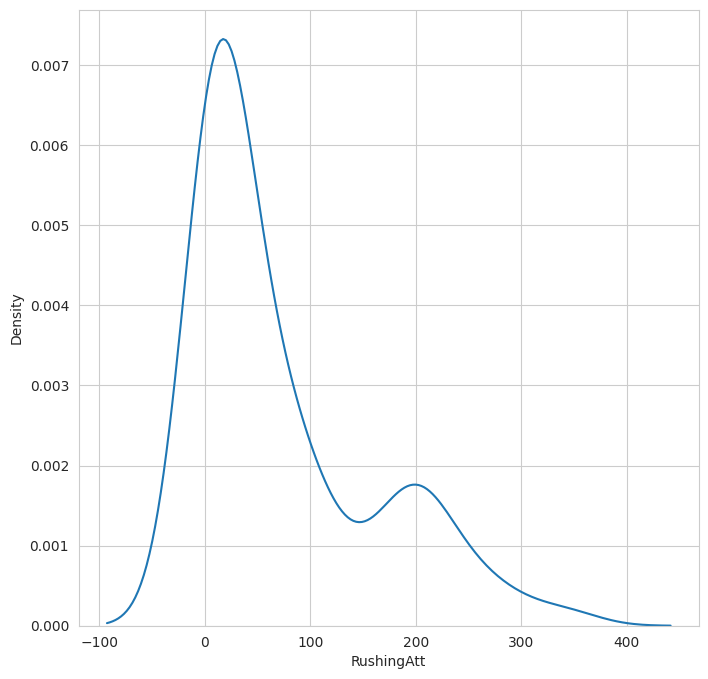

In [38]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['RushingAtt']);

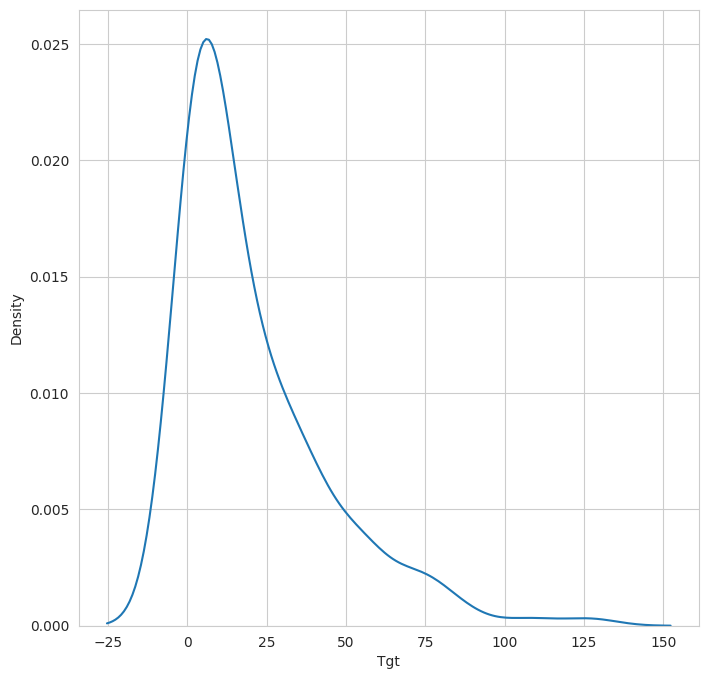

In [39]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['Tgt']);

<Figure size 800x800 with 0 Axes>

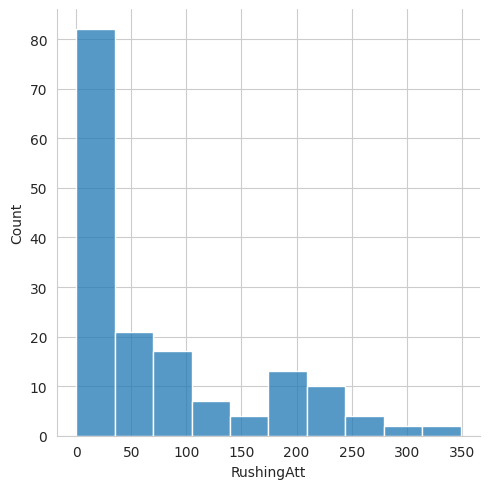

In [40]:
plt.figure(figsize=(8,8))
sns.displot(rb_df['RushingAtt']);

<Figure size 800x800 with 0 Axes>

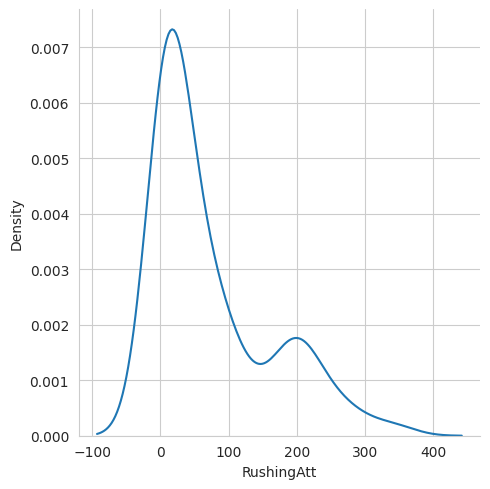

In [41]:
plt.figure(figsize=(8,8))
sns.displot(rb_df['RushingAtt'],kind='kde');

<Figure size 800x800 with 0 Axes>

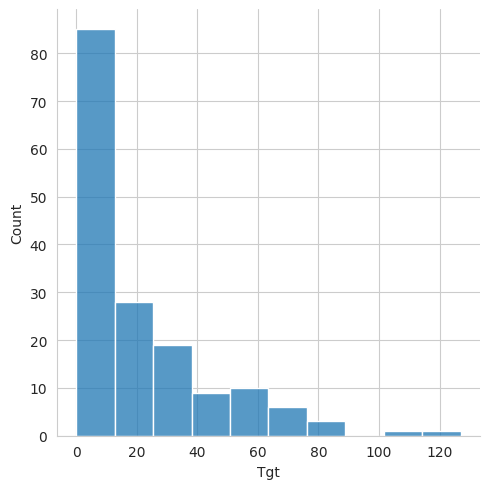

In [42]:
plt.figure(figsize=(8,8))
sns.displot(rb_df['Tgt'],bins=10);

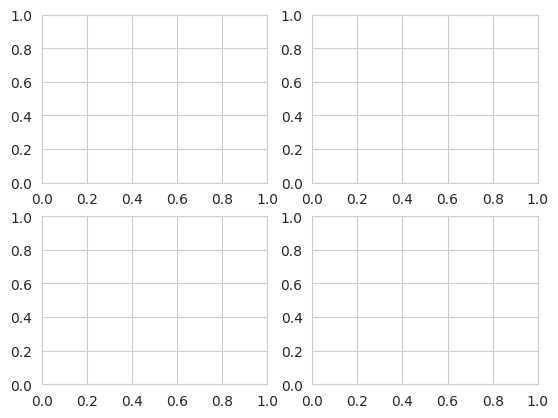

In [43]:
fig, ax = plt.subplots(2,2)

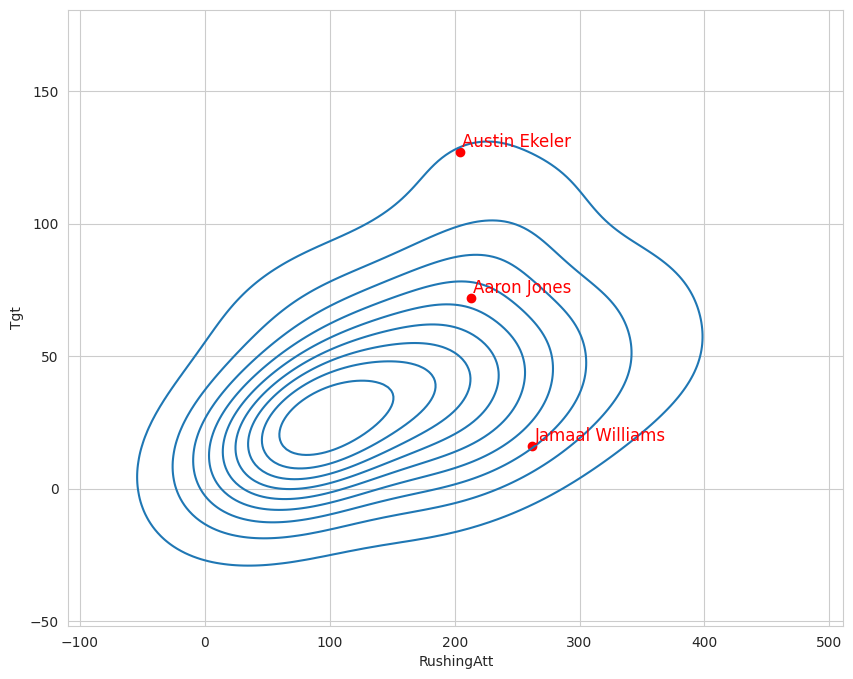

In [44]:
fig, ax = plt.subplots(figsize=(10,8))

rb_df_filtered = rb_df.loc[rb_df['RushingAtt'] > 50]

notable_players = [
    'Austin Ekeler', 'Aaron Jones', 'Jamaal Williams'
]

for player_name in notable_players:
  player = rb_df_filtered.loc[rb_df_filtered['Player'] == player_name]
  if not player.empty:
    targets = player['Tgt']
    rushes = player['RushingAtt']

    ax.annotate(player_name, xy=[rushes+2,targets+2], color='red', fontsize='12')
    ax.scatter(rushes, targets, color='red')
sns.kdeplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'], ax=ax, bw_method=.7);


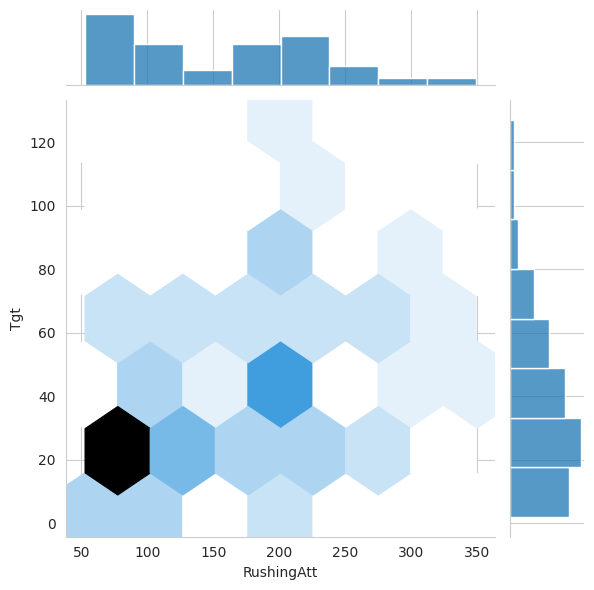

In [45]:
sns.jointplot(x=rb_df_filtered['RushingAtt'], y=rb_df_filtered['Tgt'], kind='hex', dropna=True)

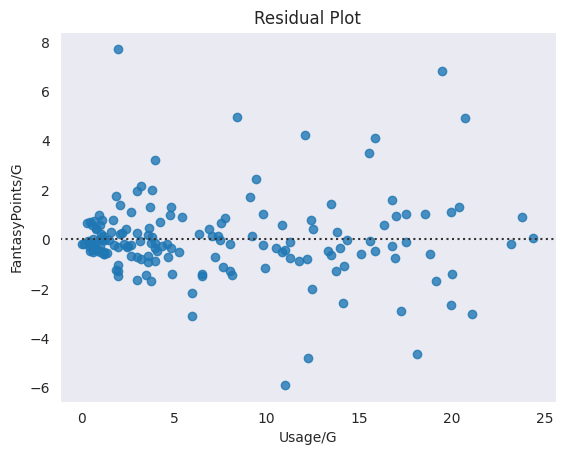

In [46]:
sns.set_style('dark')
sns.residplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G'])
plt.title('Residual Plot');

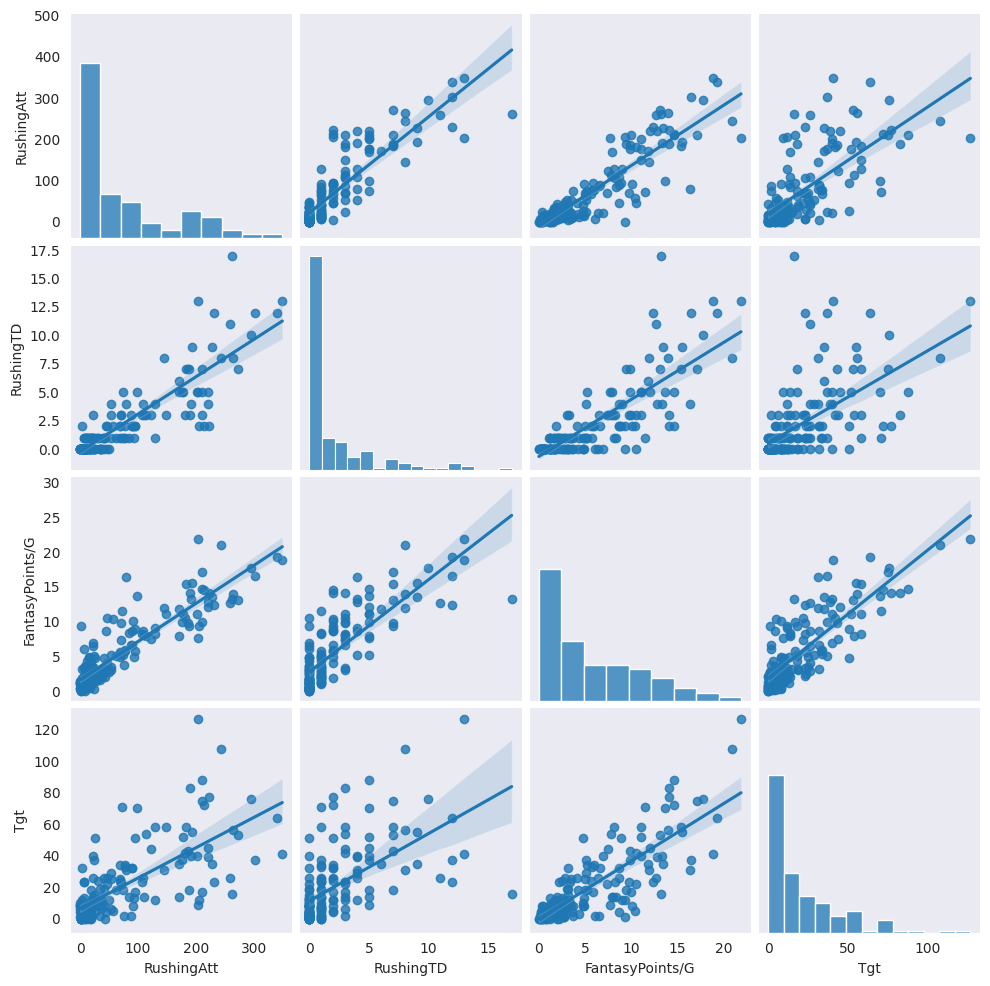

In [47]:
rb_df_copy = rb_df[['RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt']]
sns.pairplot(rb_df_copy, kind='reg')

In [48]:
weekly_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202022/weekly_df.csv')
weekly_df.head()

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,17,1,27,18,9,1.050854,0,2,-1,0,0,-1.437167,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,2,0,34,18,8,2.428707,0,3,-2,0,0,-7.115407,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,20,0,42,31,15,1.076749,0,1,-1,0,0,0.000000,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,12,0,52,39,23,9.511334,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,0,0,52,35,17,12.989590,1,3,-3,0,0,-3.336036,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74


In [49]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5629 entries, 0 to 5628
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PlayerID               5629 non-null   object 
 1   Player                 5629 non-null   object 
 2   Position               5629 non-null   object 
 3   Tm                     5629 non-null   object 
 4   Week                   5629 non-null   int64  
 5   PassingYds             5629 non-null   int64  
 6   PassingAirYards        5629 non-null   int64  
 7   PassingYAC             5629 non-null   int64  
 8   PassingTD              5629 non-null   int64  
 9   Sacks                  5629 non-null   int64  
 10  SackYards              5629 non-null   int64  
 11  Int                    5629 non-null   int64  
 12  PassingAtt             5629 non-null   int64  
 13  Cmp                    5629 non-null   int64  
 14  PassingFirstDown       5629 non-null   int64  
 15  Pass

In [50]:
allen = weekly_df.loc[weekly_df['Player'] == 'Josh Allen']
mahomes = weekly_df.loc[weekly_df['Player'] == 'Patrick Mahomes']
wilson = weekly_df.loc[weekly_df['Player'] == 'Russell Wilson']
hurts = weekly_df.loc[weekly_df['Player'] == 'Jalen Hurts']

In [51]:
hurts.head()

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
4025,00-0036389,Jalen Hurts,QB,PHI,1,243,130,143,0,1,4,0,32,18,12,3.580324,0,17,90,1,6,9.877655,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,24.72,24.72,24.72
4026,00-0036389,Jalen Hurts,QB,PHI,2,333,287,141,1,3,10,1,31,26,13,11.850195,0,11,57,2,3,3.054605,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,33.02,33.02,33.02
4027,00-0036389,Jalen Hurts,QB,PHI,3,340,396,149,3,3,12,0,35,22,16,15.406068,0,9,20,0,1,-4.125753,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,27.60,27.60,27.60
4028,00-0036389,Jalen Hurts,QB,PHI,4,204,156,129,0,2,13,1,25,16,8,-11.143294,0,16,38,1,4,0.732287,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,15.96,15.96,15.96
4029,00-0036389,Jalen Hurts,QB,PHI,5,239,137,166,0,2,21,0,36,26,12,3.754342,0,15,61,2,8,5.409593,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,27.66,27.66,27.66


Text(0.5, 1.0, 'Wilson vs. Mahomes vs. Allen vs. Hurts - Weekly Fantasy Points')

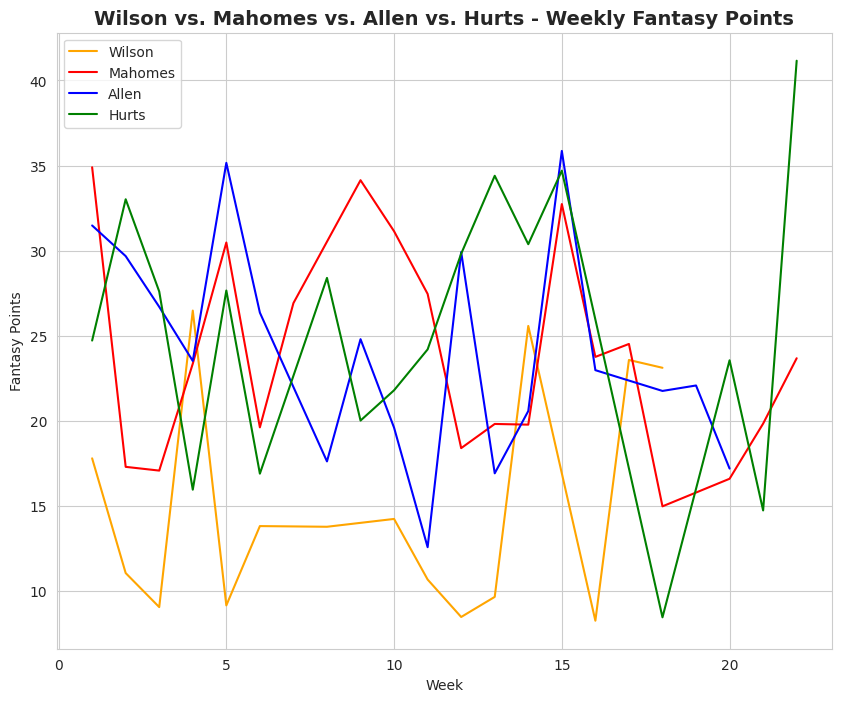

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.plot(wilson['Week'], wilson['StandardFantasyPoints'], color='orange')
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'], color='red')
plt.plot(allen['Week'], allen['StandardFantasyPoints'], color='blue')
plt.plot(hurts['Week'], hurts['StandardFantasyPoints'], color='green')
plt.legend(['Wilson', 'Mahomes', 'Allen', 'Hurts'])
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.title('Wilson vs. Mahomes vs. Allen vs. Hurts - Weekly Fantasy Points', fontsize=14, fontweight='bold')

In [53]:
hurts.corr()

,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
Week,1.000000,-0.234999,0.289184,-0.427153,-0.088697,-2.587106e-01,-0.225772,-0.009944,0.066239,-0.001757,-0.384036,-0.067310,NaN,-0.073455,-0.007254,0.228353,0.233929,0.048226,3.158053e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223375,0.029402,0.029402,0.029402
PassingYds,-0.234999,1.000000,0.725007,0.757637,0.238393,1.250586e-01,-0.142975,0.191227,0.782621,0.836693,0.838015,0.637970,NaN,-0.151889,-0.258103,0.328590,-0.226617,-0.112089,3.051425e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048576,0.621154,0.621154,0.621154
PassingAirYards,0.289184,0.725007,1.000000,0.259423,0.230621,1.392382e-03,-0.249432,0.299018,0.654219,0.588875,0.448247,0.501143,NaN,-0.149619,-0.146611,0.402220,-0.103253,-0.133576,4.767746e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088365,0.615559,0.615559,0.615559
PassingYAC,-0.427153,0.757637,0.259423,1.000000,-0.122308,1.250000e-01,0.044319,0.139616,0.714254,0.678327,0.725838,0.257138,NaN,0.095451,-0.248171,0.256490,-0.160160,-0.064266,8.734848e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.133102,0.271951,0.271951,0.271951
PassingTD,-0.088697,0.238393,0.230621,-0.122308,1.000000,3.780444e-01,0.193652,-0.424745,-0.089180,0.063914,0.333550,0.708267,NaN,-0.730135,-0.272189,-0.487692,-0.429344,-0.245594,-1.439403e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020563,0.273811,0.273811,0.273811
Sacks,-0.258711,0.125059,0.001392,0.125000,0.378044,1.000000e+00,0.830215,-0.273861,-0.066591,0.112916,0.247509,0.125761,NaN,-0.345908,-0.165390,-0.447214,-0.210915,-0.350288,-1.570092e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282843,-0.103951,-0.103951,-0.103951
SackYards,-0.225772,-0.142975,-0.249432,0.044319,0.193652,8.302147e-01,1.000000,-0.188139,-0.134856,-0.076761,0.044837,-0.164098,NaN,-0.211588,0.011127,-0.456496,-0.043245,-0.053164,-9.623778e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085239,-0.243060,-0.243060,-0.243060
Int,-0.009944,0.191227,0.299018,0.139616,-0.424745,-2.738613e-01,-0.188139,1.000000,0.166370,0.029451,0.022043,-0.326075,NaN,0.198687,-0.114905,0.408248,-0.140028,-0.040696,2.581989e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.258199,-0.046543,-0.046543,-0.046543
PassingAtt,0.066239,0.782621,0.654219,0.714254,-0.089180,-6.659088e-02,-0.134856,0.166370,1.000000,0.837145,0.644041,0.425915,NaN,0.086362,-0.024674,0.458461,0.162627,0.103144,3.221732e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.034696,0.553992,0.553992,0.553992
Cmp,-0.001757,0.836693,0.588875,0.678327,0.063914,1.129161e-01,-0.076761,0.029451,0.837145,1.000000,0.688957,0.588829,NaN,-0.057992,-0.107955,0.527520,0.128358,0.039078,3.478905e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211016,0.677028,0.677028,0.677028


<Axes: >

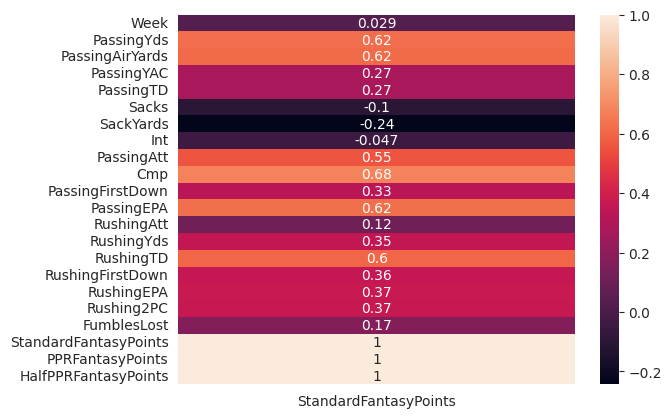

In [60]:
corr = hurts.corr()[['StandardFantasyPoints']].dropna()
sns.heatmap(corr, annot=True)

In [63]:
df_copy = df.copy()
df_copy['Usage/G'] = (df_copy['PassingAtt'] + df_copy['Tgt'] + df_copy['RushingAtt'])/+ df_copy['G']
df_copy['FantasyPoints/G'] = df_copy['FantasyPoints'] /df_copy['G']

df_copy.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage/G,FantasyPoints/G
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4,41.764706,24.552941
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,20.764706,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,24.500000,18.925000
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7,11.176471,21.688235


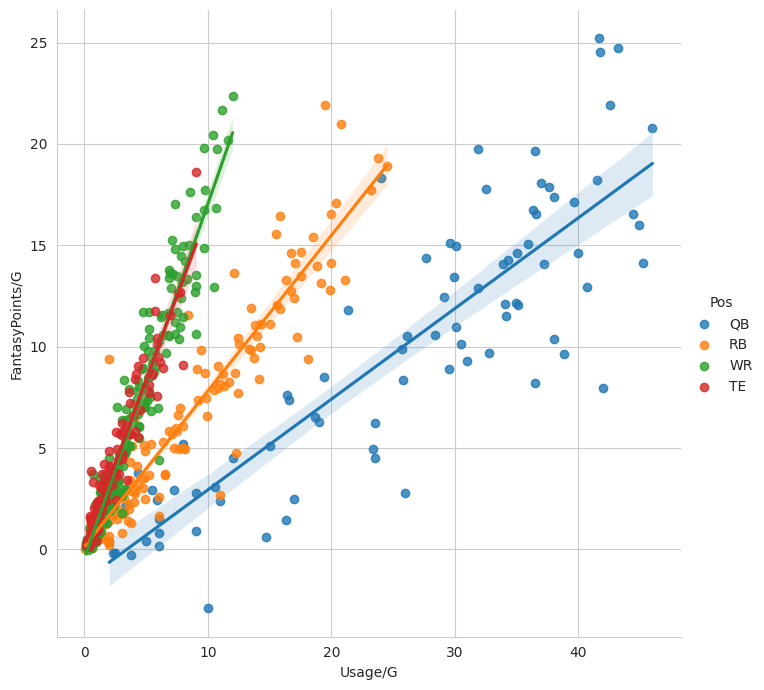

In [64]:
sns.lmplot(data=df_copy, x='Usage/G', y='FantasyPoints/G', hue='Pos', height=7)

In [65]:
combine_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202023.csv')

combine_df.head()

,Year,DraftTeam,DraftRound,DraftOverallPick`,PFRPlayerID,CFBPlayerID,Player,Pos,School,Height,Weight,40YD,BenchReps,Vertical,BroadJump,3Cone,Shuttle
0,2000,New York Jets,1.0,13.0,AbraJo00,NaN,John Abraham,OLB,South Carolina,4-Jun,252.0,4.55,NaN,NaN,NaN,NaN,NaN
1,2000,Seattle Seahawks,1.0,19.0,AlexSh00,shaun-alexander-1,Shaun Alexander,RB,Alabama,Jun-00,218.0,4.58,NaN,NaN,NaN,NaN,NaN
2,2000,Kansas City Chiefs,6.0,188.0,AlfoDa20,NaN,Darnell Alford,OT,Boston Col.,4-Jun,334.0,5.56,23.0,25.0,94.0,8.48,4.98
3,2000,NaN,NaN,NaN,NaN,NaN,Kyle Allamon,TE,Texas Tech,2-Jun,253.0,4.97,NaN,29.0,104.0,7.29,4.49
4,2000,Carolina Panthers,1.0,23.0,AndeRa21,NaN,Rashard Anderson,CB,Jackson State,2-Jun,206.0,4.55,NaN,34.0,123.0,7.18,4.15


In [67]:
combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,175.0,5.232971,0.162464,4.83,5.1300,5.230,5.3350,5.84
CB,735.0,4.492830,0.093485,4.23,4.4300,4.490,4.5500,4.94
DB,55.0,4.531636,0.125812,4.31,4.4400,4.510,4.6150,4.85
DE,503.0,4.829066,0.141248,4.36,4.7400,4.830,4.9200,5.24
DL,104.0,4.976346,0.208014,4.52,4.8300,4.980,5.1400,5.46
DT,477.0,5.098700,0.164047,4.68,4.9800,5.080,5.2000,5.71
EDGE,50.0,4.690200,0.153057,4.36,4.5825,4.690,4.7900,5.08
FB,119.0,4.765966,0.138603,4.53,4.6650,4.740,4.8700,5.31
ILB,265.0,4.753774,0.121281,4.42,4.6600,4.750,4.8300,5.18


In [72]:
plt.figure(figsize=(8,8))

combine_df_skill_players = combine_df.loc[combine_df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]
combine_df_skill_players['Pos'].unique()

array(['RB', 'TE', 'QB', 'WR'], dtype=object)

<Figure size 800x800 with 0 Axes>

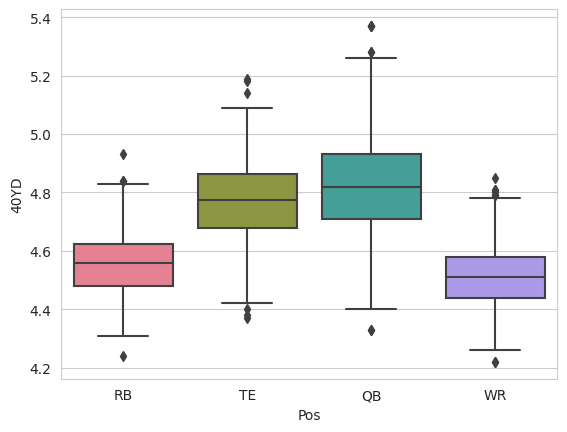

In [75]:
sns.boxplot(x='Pos', y='40YD', data=combine_df_skill_players, palette=sns.color_palette('husl',n_colors=4));